In [ ]:
from textblob import TextBlob
import pandas as pd  
import numpy as np
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [ ]:
dilma1turno=pd.read_csv("DadoFinal_Dilma1turno.txt",delimiter="\t",encoding='latin-1')


In [ ]:
dilma1turno = dilma1turno.dropna()
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(
    dilma1turno.text, dilma1turno.sentiment
)

In [ ]:

def do_forest(n_estimators, accuracy):
    vectorizer = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    forest = RandomForestClassifier(n_estimators=n_estimators) 
    pipe = Pipeline([('vect', vectorizer), ('forest', forest)])
    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,Y_pred))

In [ ]:
accuracy = []

for n in range(1,50):
    do_forest(n, accuracy)
    print(n)

Text(0,0.5,'Testing Accuracy')

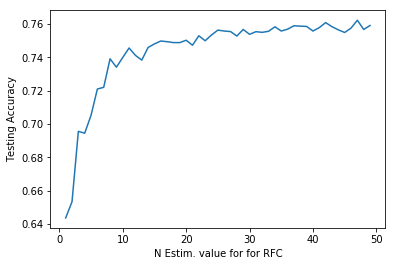

In [27]:
plt.plot(range(1, 50), accuracy)
plt.xlabel('N Estim. value for for RFC')
plt.ylabel('Testing Accuracy')

In [29]:
print( X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(38068,) (12690,) (38068,) (12690,)


In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
logreg = LogisticRegression()
vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
pipe = Pipeline([('vect', vect), ('logreg', logreg)])

pipe.fit(X_train, Y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [33]:
Y_pred = pipe.predict(X_test)
print (metrics.accuracy_score(Y_test,Y_pred))

0.7657998423955871


In [34]:
from sklearn.neighbors import KNeighborsClassifier

def do_knn(n_neighbors, accuracy):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    vect = CountVectorizer(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None)
    pipe = Pipeline([('vect', vect), ('knn', knn)])

    pipe.fit(X_train, Y_train)
    Y_pred = pipe.predict(X_test)
    acc = metrics.accuracy_score(Y_test,Y_pred)
    accuracy.append(acc)

In [ ]:
accuracy = []
for n in range(1, 100):
    do_knn(n, accuracy)